In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv('titanic-2.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data['Embarked']=data['Embarked'].dropna(inplace=True)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.drop_duplicates(inplace=True)  # duplicated value deleted

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [9]:
data['Age'].fillna(data['Age'].mean(),inplace=True)  # Age is Null so it will fill by Average Age column

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9004\3734951046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)  # Age is Null so it will fill by Average Age column


In [10]:
data = data.drop(columns=['PassengerId','Name','Cabin']) 
# those column was droped because it is useless 
#cabin remved beacuse it was hieghtly null value 

# Encoding

In [11]:
new_age = data[['Sex']]
pd.get_dummies(new_age)

one = OneHotEncoder(drop='first')
ar = one.fit_transform(new_age).toarray()
ar

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [12]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
data['Sex'] = pd.DataFrame(ar,columns=['Sex'])

In [14]:
label = LabelEncoder()
data['Ticket'] = label.fit_transform(data['Ticket'])

In [15]:
Ordina = OrdinalEncoder()
data['Embarked'] = Ordina.fit_transform(data[['Embarked']])

In [16]:
data['Age'] = round(data['Age'],0)
data['Fare'] = round(data['Fare'],0)

In [17]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1.0,22.0,1,0,523,7.0,0.0
1,1,1,0.0,38.0,1,0,596,71.0,0.0
2,1,3,0.0,26.0,0,0,669,8.0,0.0
3,1,1,0.0,35.0,1,0,49,53.0,0.0
4,0,3,1.0,35.0,0,0,472,8.0,0.0


# Data Spliting

In [18]:
x = data.drop(columns=['Survived'])
y = data['Survived']

In [19]:
y.value_counts()  # Data is imbalanced

Survived
0    549
1    342
Name: count, dtype: int64

In [20]:
Sampling = RandomUnderSampler(random_state=5)   # balancing data
x,y = Sampling.fit_resample(x,y)

In [21]:
y.value_counts()

Survived
0    342
1    342
Name: count, dtype: int64

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

# Model Train

In [23]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Model Evalution

In [24]:
Y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(Y_test,Y_pred)*100
precision= precision_score(Y_test,Y_pred,average='weighted')*100
recall= recall_score(Y_test,Y_pred,average='weighted')*100
f1score= f1_score(Y_test,Y_pred,average='weighted')*100

In [26]:
print(f"Accuracy : {accuracy:.2f} ")
print(f"Precision : {precision:.2f} ")
print(f"Recall : {recall:.2f} ")
print(f"F1_Score : {f1score:.2f} ")

Accuracy : 78.10 
Precision : 78.83 
Recall : 78.10 
F1_Score : 78.04 


# Decision Tree Visulization

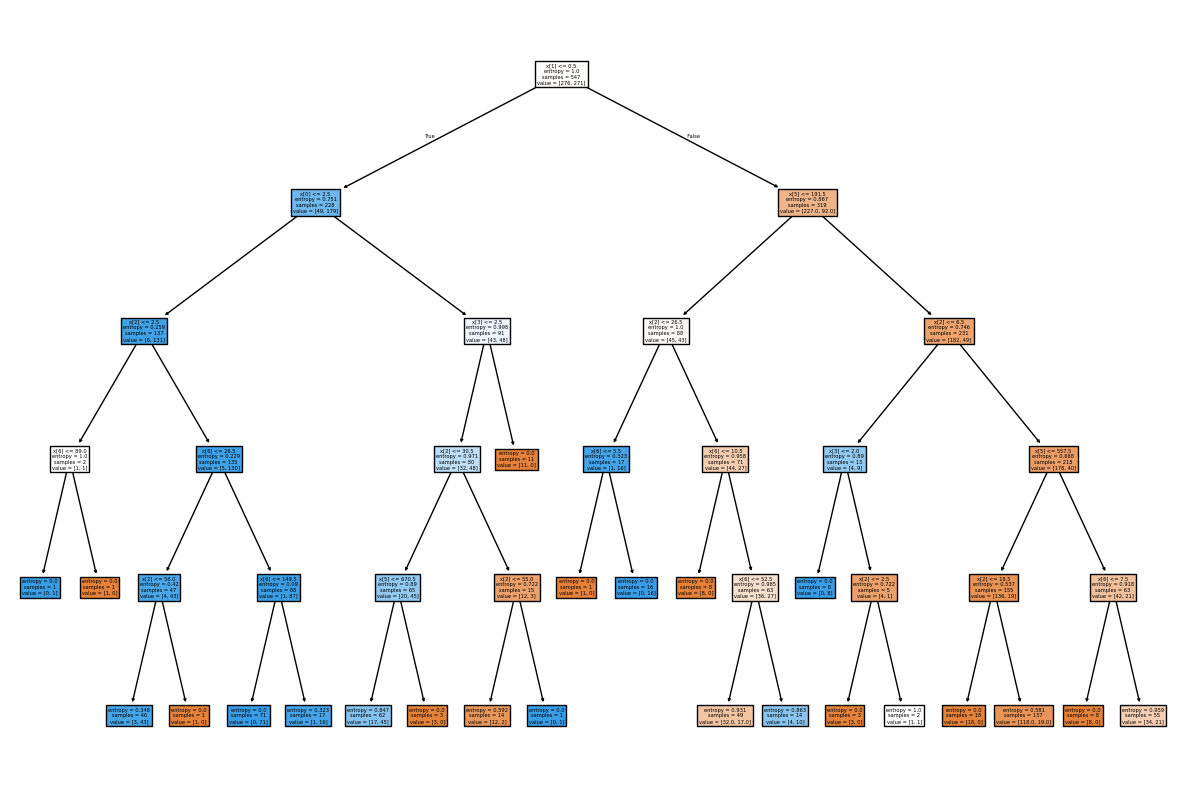

In [27]:
plt.figure(figsize=(15,10))
plot_tree(model,filled=True)
plt.show()